# Exploratory Data Analysis

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import wrangle as w

In [2]:
# wrangle data
jobs = w.wrangle_jobs()
jobs.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent,continent,employment_type_Employee,employment_type_Non-employee,...,required_experience_Med,required_education_College,required_education_None,required_education_Vocational,continent_AF,continent_AS,continent_EU,continent_NA,continent_OC,continent_SA
0,0,1,0,Unspecified,Low,None,0,NA,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,1,0,Employee,Low,None,0,OC,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,Unspecified,Low,None,0,NA,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,1,0,Employee,Med,College,0,NA,1,0,...,1,1,0,0,0,0,0,1,0,0
4,0,1,1,Employee,Med,College,0,NA,1,0,...,1,1,0,0,0,0,0,1,0,0


## Univariate Analysis

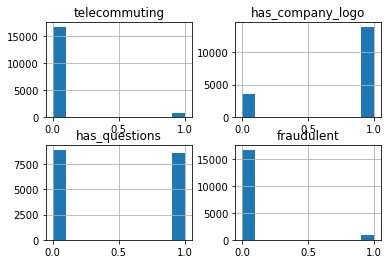

In [3]:
# view distributions
jobs[['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']].hist();

In [4]:
# view summary stats
jobs.describe()

,telecommuting,has_company_logo,has_questions,fraudulent,employment_type_Employee,employment_type_Non-employee,employment_type_Unspecified,required_experience_High,required_experience_Low,required_experience_Med,required_education_College,required_education_None,required_education_Vocational,continent_AF,continent_AS,continent_EU,continent_NA,continent_OC,continent_SA
count,17534.000000,17534.000000,17534.000000,17534.000000,17534.000000,17534.000000,17534.000000,17534.000000,17534.000000,17534.000000,17534.000000,17534.000000,17534.000000,17534.000000,17534.000000,17534.000000,17534.000000,17534.000000,17534.000000
mean,0.042546,0.794399,0.491616,0.048306,0.701893,0.099863,0.198243,0.029999,0.754648,0.215353,0.331927,0.650622,0.017452,0.007528,0.051785,0.270617,0.636078,0.031197,0.002795
std,0.201837,0.404151,0.499944,0.214418,0.457440,0.299826,0.398688,0.170589,0.430308,0.411079,0.470918,0.476787,0.130951,0.086441,0.221599,0.444291,0.481140,0.173853,0.052791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

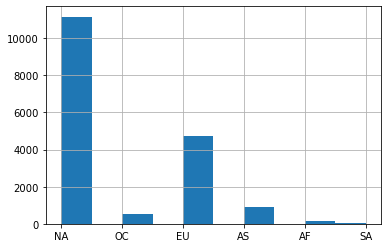

In [5]:
# view histogram
jobs.continent.hist()

<AxesSubplot:>

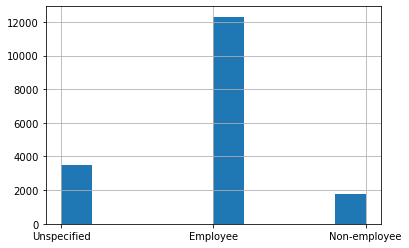

In [6]:
# view histogram
jobs.employment_type.hist()

<AxesSubplot:>

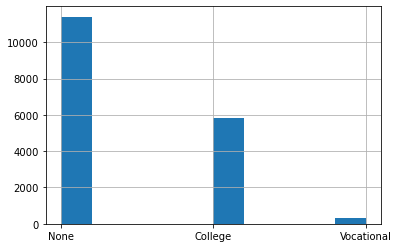

In [7]:
# view histogram
jobs.required_education.hist()

<AxesSubplot:>

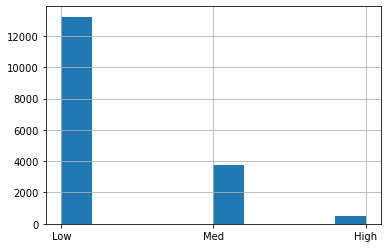

In [8]:
# view histogram
jobs.required_experience.hist()

#### Takeaways:
- I see that most of these job postings are not fraudulent. I'll need to be sure to stratify in my split to ensure I am working with data that is representative of the whole.
- The distributions of `fraudulent` and `telecommuting` appear to be quite similar.
- Most job postings do have a company logo.
- About half of these listings have questions.
- Most listings are located in North America.
- Most listings are for employee positions.
- Most listings did not specify that a higher education degree is required.
- Most listings require minimal experience.

Next, I will split my data.

In [9]:
# split data
train, validate, test = w.split_data(jobs, 'fraudulent')
train.shape, validate.shape, test.shape

((9818, 23), (4209, 23), (3507, 23))

### Question 1: Are job listings without a higher education requirement more likely to be fake?

- $H_{0}$: There is not a relationship between job postings without a higher education requirement and authenticity of the job posting.
- $H_{a}$: There is a significant relationship between job postings without a higher education requirement and authenticity of the job posting.

[Text(0.5, 1.0, 'Most Fraudulent Job Listings Do Not Require A Higher Education'),
 Text(0, 0.5, '% of Listings')]

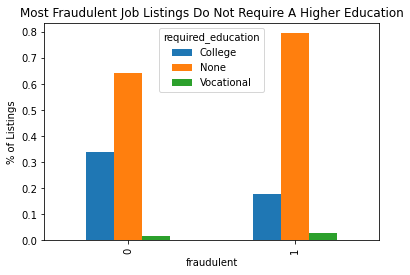

In [63]:
pd.crosstab(train.fraudulent, train.required_education, normalize='index').plot.bar().set(title='Most Fraudulent Job Listings Do Not Require A Higher Education', ylabel='% of Listings')

In [64]:
alpha = 0.05

null_hypothesis = 'there is not a relationship between job postings without a higher education requirement and authenticity of the job posting.'
alt_hypothesis = 'there is a significant relationship between job postings without a higher education requirement and authenticity of the job posting.'
chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(train.fraudulent, train.required_education_None))
chi2, p

if p > alpha:
    print(f'There is not sufficient evidence to reject our null hypothesis that {null_hypothesis}')
else:
    print(f'There is sufficient evidence to move forward with the alternative hypothesis that {alt_hypothesis}')

There is sufficient evidence to move forward with the alternative hypothesis that there is a significant relationship between job postings without a higher education requirement and authenticity of the job posting.


### Answer 1: Job postings without a higher education requirement are fraudulent more often than job postings that do specify a higher education requirement.

### Question 2: Is there a region that is more likely to have fake job listings?
- $H_{0}$: There is not a relationship between fraudulent job listings and job listings in North America.
- $H_{a}$: There is a significant relationship between fraudulent job listings and job listings in North America.

[Text(0.5, 1.0, 'North America is Most Likely to Have Fake Job Postings'),
 Text(0, 0.5, '% of Listings')]

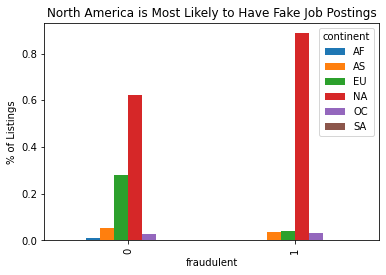

In [66]:
pd.crosstab(train.fraudulent, train.continent, normalize='index').plot.bar().set(title='North America is Most Likely to Have Fake Job Postings', ylabel='% of Listings');

In [68]:
alpha = 0.05

null_hypothesis = 'there is not a relationship between fraudulent job listings and job listings in North America.'
alt_hypothesis = 'there is a significant relationship between fraudulent job listings and job listings in North America.'
chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(train.fraudulent, train.continent_NA))
chi2, p

if p > alpha:
    print(f'There is not sufficient evidence to reject our null hypothesis that {null_hypothesis}')
else:
    print(f'There is sufficient evidence to move forward with the alternative hypothesis that {alt_hypothesis}')

There is sufficient evidence to move forward with the alternative hypothesis that there is a significant relationship between fraudulent job listings and job listings in North America.


### Answer 2: Job listings with North America as their location are more likely to be fraudulent than listings specifying other regions as their location.

### Question 3: Is there a difference in frequency of fake job listings across employment types? 

Question rephrased for stat test: Is there a relationship between fraudulent job listings and job listings with unspecified employment types?

- $H_{0}$: There is not a relationship between fraudulent job listings and unspecified employment types in job listings.
- $H_{a}$: There is a significant relationship between fraudulent job listings and unspecified employment types in job listings.

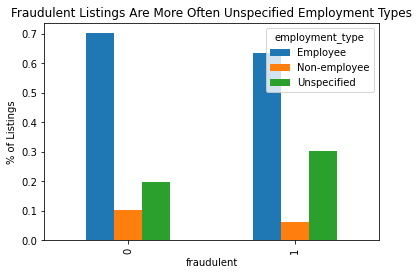

In [58]:
pd.crosstab(train.fraudulent, train.employment_type, normalize='index').plot.bar().set(title='Fraudulent Listings Are More Often Unspecified Employment Types', ylabel='% of Listings');

In [67]:
alpha = 0.05

null_hypothesis = 'there is not a relationship between fraudulent job listings and unspecified employment types.'
alt_hypothesis = 'there is a significant relationship between fraudulent job listings and unspecified employment types.'
chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(train.fraudulent, train.employment_type_Unspecified))
chi2, p

if p > alpha:
    print(f'There is not sufficient evidence to reject our null hypothesis that {null_hypothesis}')
else:
    print(f'There is sufficient evidence to move forward with the alternative hypothesis that {alt_hypothesis}')

There is sufficient evidence to move forward with the alternative hypothesis that there is a significant relationship between fraudulent job listings and unspecified employment types.


### Answer 3: There is a relationship between job listings with unspecified employment types and whether or not the listing is authentic.

### Question 4: Are there any words or phrases that occur commonly in fake job listings?

This question won't be a part of the model I will be creating in the next step, but it is definitely something I want to look into. If there are buzzwords that occur more frequently in fake job postings, that's absolutely something I want to document.

In [73]:
def get_descriptions():
    return pd.read_csv('fake_job_postings.csv')[['description', 'fraudulent']].dropna()
desc = get_descriptions()

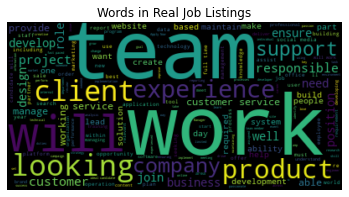

In [79]:
real = desc[desc.fraudulent == 0]

plt.imshow(WordCloud().generate(real.description.str.cat()), interpolation='bilinear')
plt.title('Words in Real Job Listings')
plt.axis("off")
plt.show();

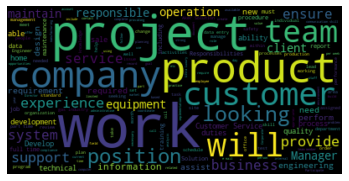

In [77]:
fake = desc[desc.fraudulent == 1]

plt.imshow(WordCloud().generate(fake.description.str.cat()), interpolation='bilinear')
plt.axis("off")
plt.show();

### Answer 4: There do not appear to be any significant differences between words most often used in fake job listings and words most often used in real job listings.